## 회귀 연습 문제 (penguin)

### 1. k-최근접 이웃 회귀 (길이를 기준으로 body_mass 확인)

In [170]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [171]:
# 1. 결측치 확인
df.notna().sum()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [172]:
# 1-1 결측치 빼기 or 평균값으로 채워넣기

# df = df.dropna()

cond1 = df['species'] == 'Adelie'
adelie_mean = df.loc[cond1, ['flipper_length_mm', 'bill_length_mm']].mean()
df.loc[cond1, ['flipper_length_mm', 'bill_length_mm']] = df.loc[cond1, ['flipper_length_mm', 'bill_length_mm']].fillna(adelie_mean)

In [173]:
# 2. adelie 종만 뽑기

df['species'].value_counts()

adelie_data = df.loc[df['species'] == 'Adelie']
adelie_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.7,181.000000,3750.0,Male
1,Adelie,Torgersen,39.500000,17.4,186.000000,3800.0,Female
2,Adelie,Torgersen,40.300000,18.0,195.000000,3250.0,Female
3,Adelie,Torgersen,38.791391,NaN,189.953642,NaN,NaN
4,Adelie,Torgersen,36.700000,19.3,193.000000,3450.0,Female
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.600000,18.4,184.000000,3475.0,Female
148,Adelie,Dream,36.000000,17.8,195.000000,3450.0,Female
149,Adelie,Dream,37.800000,18.1,193.000000,3750.0,Male
150,Adelie,Dream,36.000000,17.1,187.000000,3700.0,Female


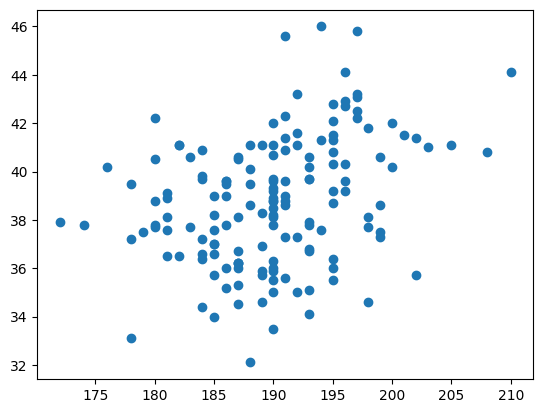

In [174]:
# 3. 산포도 확인 (선형 / 비선형)
import matplotlib.pyplot as plt
plt.scatter(adelie_data['flipper_length_mm'], adelie_data['bill_length_mm'])                 # -> 비선형임으로 다항회귀 필요. 

In [175]:
# 4. 훈련용 셋, 테스트용 셋 섞어주기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(adelie_data[['flipper_length_mm']], adelie_data[['bill_length_mm']])

In [176]:
# train_median = train_input.median()
# train_filled = train_input.fillna(train_median)
# test_filled = test_input.fillna(train_median)

In [177]:
# 5. k-최근접 이웃 회귀

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [178]:
# 6. 학습, 평가

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [179]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.2748668425344858
0.17585822523343397


## 1.2 선형 회귀
- 산점도가 선형일 경우에만 가능

In [125]:
import seaborn as sns
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [126]:
# 1. 남자 펭귄을 기준으로 길이, 무게 예측

male_data = df.loc[df['sex'] == 'Male']

male_length = male_data[['bill_length_mm']]
male_mass = male_data[['body_mass_g']]

In [127]:
# 2. 훈련용, 테스트용 나눠서 섞기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(male_length, male_mass)

In [128]:
# 3. 선형 회귀

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [129]:
# 학습 , 평가 

lr.fit(train_input, train_target)

LinearRegression()

In [130]:
print(lr.score(train_input, train_target))

print(lr.score(test_input, test_target))

0.18893843309759928
0.3561481057260878


## 1.3 다항 회귀

In [277]:
import seaborn as sns
df = sns.load_dataset('penguins')

In [278]:
# 수치형 특성 결측치 채우기
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [279]:
# 범주형 특성 결측치 채우기
categorical_columns = ['sex']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

In [281]:
adelie_data = df.loc[df['species'] == 'Adelie']
adelie_data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [285]:
# 1. 길이, 깊이, 부리 길이 기준으로 무게 예측

adelie_full = adelie_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
adelie_weight = adelie_data[['body_mass_g']]

In [286]:
# 2. 훈련용, 테스트용 넣고 섞어주기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(adelie_full, adelie_weight)

In [287]:
# 3. 다항회귀 (from sklearn.preprocessing import PolynomialFeatures) 

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False) 

In [288]:
# 4. 학습 
poly.fit(train_input)
train_poly = poly.transform(train_input)

train_poly.shape

(114, 9)

In [289]:
# 4.1 9개 특성, 조합을 확인
poly.get_feature_names_out() #특성공학 : 기존 특성으로 새로운 특성을 만들어 조합이 만들어짐 확인

array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'bill_length_mm^2', 'bill_length_mm bill_depth_mm',
       'bill_length_mm flipper_length_mm', 'bill_depth_mm^2',
       'bill_depth_mm flipper_length_mm', 'flipper_length_mm^2'],
      dtype=object)

In [290]:
# 5. 회귀 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 6. 훈련용 셋 학습, 평가
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.5202148591196405

In [291]:
# 7. 테스트용 셋 평가
test_poly = poly.transform(test_input)

lr.score(test_poly, test_target)

0.45324488331496793

### - 성능이 떨어지는 경우 더 많은 특성의 조합 돌리기

In [292]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape                               # 9 -> 55개의 특성의 조합이 생김.

(114, 55)

In [293]:
poly.get_feature_names_out() 

array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'bill_length_mm^2', 'bill_length_mm bill_depth_mm',
       'bill_length_mm flipper_length_mm', 'bill_depth_mm^2',
       'bill_depth_mm flipper_length_mm', 'flipper_length_mm^2',
       'bill_length_mm^3', 'bill_length_mm^2 bill_depth_mm',
       'bill_length_mm^2 flipper_length_mm',
       'bill_length_mm bill_depth_mm^2',
       'bill_length_mm bill_depth_mm flipper_length_mm',
       'bill_length_mm flipper_length_mm^2', 'bill_depth_mm^3',
       'bill_depth_mm^2 flipper_length_mm',
       'bill_depth_mm flipper_length_mm^2', 'flipper_length_mm^3',
       'bill_length_mm^4', 'bill_length_mm^3 bill_depth_mm',
       'bill_length_mm^3 flipper_length_mm',
       'bill_length_mm^2 bill_depth_mm^2',
       'bill_length_mm^2 bill_depth_mm flipper_length_mm',
       'bill_length_mm^2 flipper_length_mm^2',
       'bill_length_mm bill_depth_mm^3',
       'bill_length_mm bill_depth_mm^2 flipper_length_mm',
       'bill_leng

In [294]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))                     # -> 과대적합 (테스트용에서의 성능이 낮음)

0.6673417706736822
-16.29838213629184


### - 규제
- 훈련 세트의 과도한 학습을 방지하기 위해 계수의 크기를 줄임.

In [295]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [298]:
train_scaled[:5]

array([[ 1.07696183,  0.03761895,  0.8535078 ,  1.07240964,  0.66899512,
         1.20173759,  0.00409874,  0.35869278,  0.84318821,  1.0625017 ,
         0.84262364,  1.1597308 ,  0.41609798,  0.803543  ,  1.18832409,
        -0.02897221,  0.18234924,  0.53098998,  0.8314939 ,  1.04726973,
         0.9019544 ,  1.12624977,  0.62632831,  0.92564583,  1.18726415,
         0.26608954,  0.52977011,  0.87035357,  1.14021303, -0.06121544,
         0.09111967,  0.31894101,  0.61748969,  0.81842899,  1.02684826,
         0.92141478,  1.09617329,  0.72984802,  0.96220538,  1.15696264,
         0.45848636,  0.70382378,  0.97186127,  1.1795676 ,  0.16330269,
         0.35688465,  0.61165516,  0.89647005,  1.08888001, -0.09228165,
         0.02750563,  0.19353012,  0.41689728,  0.66125461,  0.80400796],
       [-0.39215816,  0.20102909,  1.50316467, -0.41805358, -0.14306159,
         0.21744613,  0.1671051 ,  0.75338425,  1.51298749, -0.44101248,
        -0.2802459 , -0.09465609, -0.05397823,  0.

In [304]:
# 릿지

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.5222425506701018
0.4540946962863185
